In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import math

In [44]:
training = np.loadtxt("hw04_data_set_train(1).csv",delimiter = ",")
test = np.loadtxt("hw04_data_set_test(1).csv",delimiter = ",")

In [67]:
x_train = training[:,0]
y_train = training[:,1]
x_test = test[:,0]
y_test = test[:,1]


In [68]:
bin_width = 0.1
minimum_value = 0
maximum_value = math.ceil(np.max(x_train))
left_borders = np.arange(minimum_value,maximum_value,bin_width)
right_borders = np.arange(minimum_value+ bin_width,maximum_value + bin_width,bin_width)

In [69]:
p_hat = np.asarray([np.sum(((left_borders[i] < x_train) & (x_train <= right_borders[i])) * y_train) / len(x_train[(left_borders[i] < x_train) & (x_train <= right_borders[i])]) for i in range(len(left_borders))])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


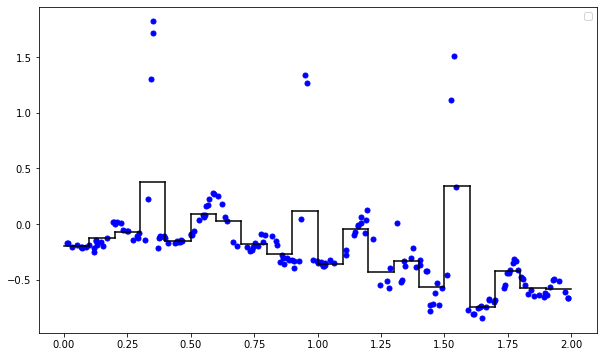

In [74]:
plt.figure(figsize = (10,6))

plt.plot(x_train,y_train,"b.",markersize = 10)
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-")
plt.legend()    
plt.show()

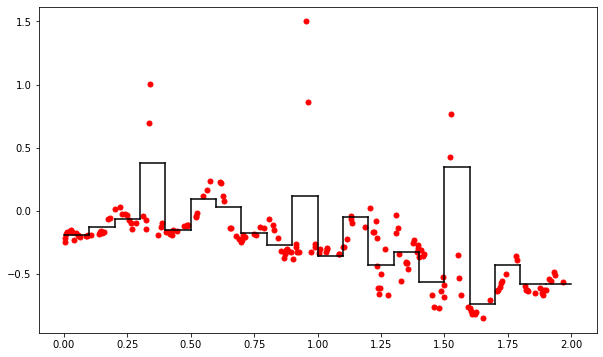

In [71]:
plt.figure(figsize = (10,6))
plt.plot(x_test,y_test,"r.",markersize = 10)
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-")    
plt.show()

In [50]:
y_hat = []
for x in x_test:
    for i in range(len(left_borders)):
        if(left_borders[i] < x and x <= right_borders[i]):
            y_hat.append(p_hat[i])
y_hat = np.asarray(y_hat)
square_error = np.sqrt(np.sum(np.square(y_test - y_hat))/len(y_test))

In [51]:
print("Regressogram => RMSE is " + str(square_error) +" when h is " + str(bin_width))

Regressogram => RMSE is 0.2557468588477479 when h is 0.1


In [52]:
bin_width = 0.1
minimum_value = 0
maximum_value = math.ceil(np.max(x_train))
data_interval = np.linspace(minimum_value, maximum_value, 1601)

p_hat = np.asarray([np.sum(y_train[(x-0.5*bin_width < x_train) & (x_train <=  (x + 0.5*bin_width))]) / np.sum(((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) for x in data_interval])

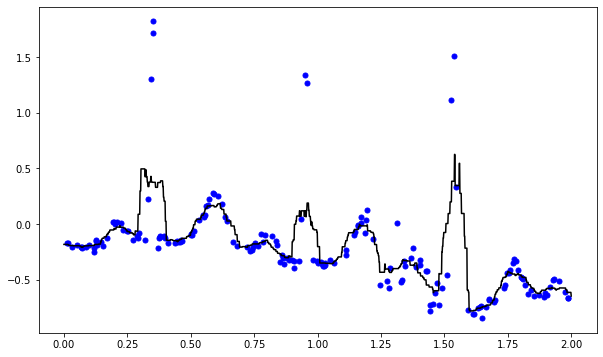

In [53]:
plt.figure(figsize = (10,6))
plt.plot(x_train,y_train,"b.",markersize = 10)
plt.plot(data_interval, p_hat, "k-")
plt.show()

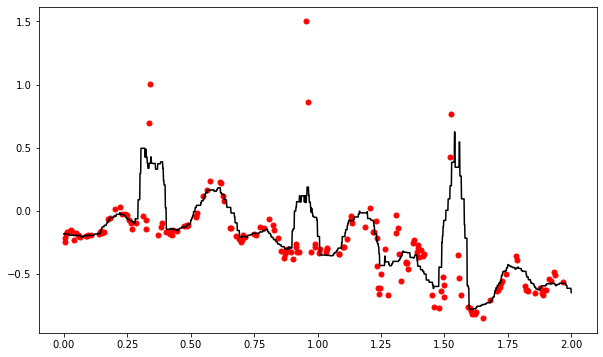

In [54]:
plt.figure(figsize = (10,6))
plt.plot(x_test,y_test,"r.",markersize = 10)
plt.plot(data_interval, p_hat, "k-")
plt.show()

In [55]:
y_hat = []
for x in x_test:
    for i in range(len(data_interval)):
        if(i == len(data_interval) -1):
            continue
        if(x > data_interval[i] and x <= data_interval[i+1]):
                y_hat.append(p_hat[i])
y_hat = np.asarray(y_hat)

In [56]:
square_error = np.sqrt(np.sum(np.square(y_test - y_hat))/len(y_test))

In [57]:
print("Running mean smoother => RMSE is " + str(square_error) +" when h is " + str(bin_width))

Running mean smoother => RMSE is 0.23886218844117482 when h is 0.1


In [58]:
bin_width = 0.02
minimum_value = 0
maximum_value = math.ceil(np.max(x_train))
data_interval = np.linspace(minimum_value, maximum_value, 1601)

In [59]:
p_hat = np.asarray([np.sum((1.0/np.sqrt(2*math.pi) * np.exp(-0.5*(x -x_train)**2 /bin_width **2)) * y_train) / np.sum((1.0/np.sqrt(2*math.pi) * np.exp(-0.5*(x -x_train)**2 /bin_width **2))) for x in data_interval])

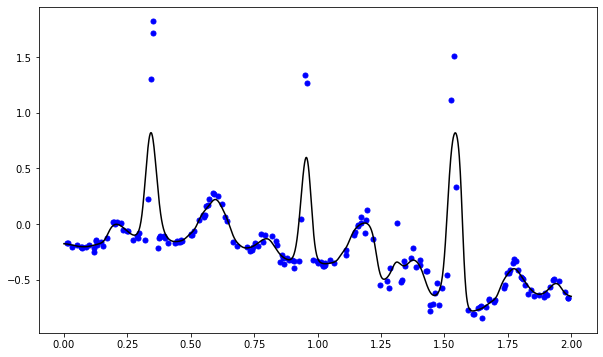

In [60]:
plt.figure(figsize = (10,6))
plt.plot(x_train,y_train,"b.",markersize = 10)
plt.plot(data_interval, p_hat, "k-")
plt.show()

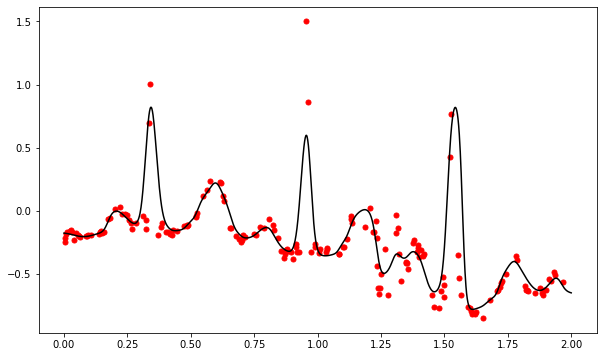

In [61]:
plt.figure(figsize = (10,6))
plt.plot(x_test,y_test,"r.",markersize = 10)
plt.plot(data_interval, p_hat, "k-")
plt.show()

In [62]:
y_hat = []
for x in x_test:
    for i in range(len(data_interval)):
        if(i == len(data_interval) -1):
            continue
        if(x > data_interval[i] and x <= data_interval[i+1]):
                y_hat.append(p_hat[i])
y_hat = np.asarray(y_hat)

In [63]:
square_error = np.sqrt(np.sum(np.square(y_test - y_hat))/len(y_test))
print("Kernel smoother => RMSE is " + str(square_error) +" when h is " + str(bin_width))

Kernel smoother => RMSE is 0.19880288325942638 when h is 0.02
